In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import os
import sys
import pandas as pd
from plotnine import *
from mizani.formatters import percent_format

In [3]:
##### load data
folder_kwdata = "/content/drive/MyDrive/hertie/lancet/lancet_2024/result_2024/"

df_health2024 = pd.read_pickle(folder_kwdata + 'df_kwic_health.pkl')
df_climate2024 = pd.read_pickle(folder_kwdata + 'df_kwic_climate.pkl')
df_intersection2024 = pd.read_csv(folder_kwdata + 'df_kwic_health_climate.csv')
df_gender2024 = pd.read_csv(folder_kwdata + 'gender.csv')
df_covid2024 = pd.read_csv(folder_kwdata + 'covid.csv')
df_equity2024 = pd.read_csv(folder_kwdata + "inequality.csv")

In [4]:
##### load data
folder_kwdata = "/content/drive/MyDrive/hertie/lancet/lancet_2023/Multiglobal_result_2023/"

df_health = pd.read_pickle(folder_kwdata + 'df_kwic_health.pkl')
df_climate = pd.read_pickle(folder_kwdata + 'df_kwic_climate.pkl')
df_intersection = pd.read_csv(folder_kwdata + 'df_kwic_health_climate.csv')
df_gender = pd.read_csv(folder_kwdata + 'gender.csv')
df_covid = pd.read_csv(folder_kwdata + 'covid.csv')
df_equity = pd.read_csv(folder_kwdata + "inequality.csv")

In [5]:
df_health = pd.concat([df_health, df_health2024]).drop_duplicates(subset = ['key_word', 'left_check',	'right_check','Id']).reset_index()
df_climate = pd.concat([df_climate, df_climate2024]).drop_duplicates(subset = ['key_word', 'left_check',	'right_check', 'Id']).reset_index()
df_intersection = pd.concat([df_intersection, df_intersection2024]).drop_duplicates(subset = ['key_word', 'left_check',	'right_check', 'Id', 'health_key']).reset_index()
df_gender = pd.concat([df_gender, df_gender2024]).drop_duplicates(subset = ['key_word', 'left_check', 'right_check', 'Id', 'climate_key', 'health_key']).reset_index()
df_covid = pd.concat([df_covid, df_covid2024]).drop_duplicates(subset = ['key_word', 'left_check', 'right_check', 'Id', 'climate_key', 'health_key']).reset_index()
df_equity = pd.concat([df_equity, df_equity2024]).drop_duplicates(subset = ['key_word', 'left_check', 'right_check', 'Id', 'climate_key', 'health_key']).reset_index()

In [6]:
csr = pd.read_csv('/content/drive/MyDrive/hertie/lancet/lancet_2023/Multiglobal_result_2023/multiglobal_english_text.csv', chunksize = 10000)
glob = pd.DataFrame()
for df in csr:
    glob = pd.concat([glob, df[['Participant', 'Sector', 'Country', 'Year', 'Id', 'code', "English", "lang"]]])


In [7]:
csr_ = pd.read_csv('/content/drive/MyDrive/hertie/lancet/lancet_2024/multiglobal_english_text_2023.csv', chunksize = 10000)
for df in csr_:
    glob = pd.concat([glob, df[['Participant', 'Sector', 'Country', 'Year', 'Id', 'code']]])

In [8]:
print(sum(glob.English == 1))
print(len(glob.English) - sum(glob.English.isna()))

21957
45460


In [ ]:
lang_2022 = pd.read_csv("/content/drive/MyDrive/hertie/lancet/lancet_2024/report_2024/nonEn_langlist.csv")

In [ ]:
lang_2022

<Axes: >

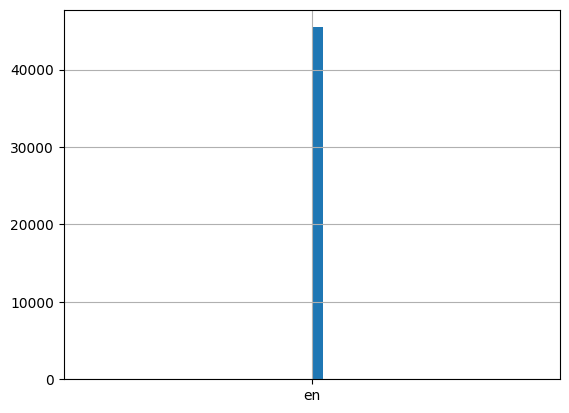

In [ ]:
# number of languages
glob.lang.hist(bins = 40)

In [9]:
glob.Participant.nunique()

15696

In [10]:
csr = glob.copy()
csr["Participant"].nunique()

15696

In [11]:
csr["Participant"] = [n.replace("-", " ").replace(".", " ").replace("&", " ").replace("(", "") for n in csr.Participant]
csr["Participant"] = [n.replace(",", "").replace("/", " ").replace("  ", " ") for n in csr.Participant]
csr["Participant"] = [n[:min(len(n)-1, 20)] for n in csr.Participant]

In [12]:
csr["Participant"].nunique()

14863

<Axes: >

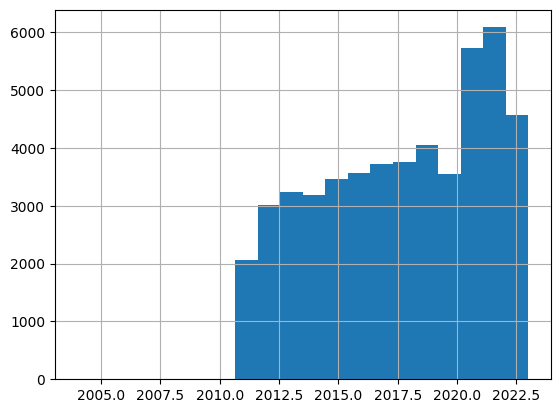

In [ ]:
csr.Year.hist(bins = 20)

In [13]:
csr = csr[csr.Year > 2010]

In [14]:
sids = ['Anguilla' ,'American Samoa' ,'Jamaica' ,'Papua New Guinea' ,'British Virgin Islands' ,
        'Kiribati' ,'Saint Vincent and the Grenadines' ,'Vanuatu' ,'Bahamas' ,
        'Fiji' ,'Puerto Rico' ,'Timor-Leste' ,'Dominican Republic' ,'New Caledonia' ,
        'United States Virgin Islands' ,'Comoros' ,'Aruba' ,'Federated States of Micronesia' ,'Netherlands Antilles' ,
        'Solomon Islands' ,'Dominica' ,'Nauru' ,'Trinidad and Tobago' ,'Cape Verde' ,
        'Belize' ,'Guam' ,'Saint Lucia' ,'Tuvalu' ,'Guyana' ,
        'Northern Mariana Islands' ,'Seychelles' ,'Maldives' ,'Antigua and Barbuda' ,'Cook Islands' ,
        'Montserrat' ,'Samoa' ,'Cuba' ,'Marshall Islands' ,'Suriname' ,
        'Bahrain' ,'Barbados' ,'French Polynesia' ,'Saint Kitts and Nevis' ,'Tonga' ,
        'Grenada' ,'Niue' ,'Sao Tome and Principe' ,'Guinea-Bissau' ,'Haiti' ,'Palau' ,'Singapore' ,'Mauritius']
tier1_countries = ["USA", "CHN"]
tier1_countries_eu = ["Austria", "Belgium", "Bulgaria", "Croatia",  "Cyprus",
                      "Czechia","Denmark", "Estonia", "Finland", "France","Germany","Greece",
                      "Hungary", "Ireland", "Italy","Latvia", "Lithuania",
                      "Luxembourg", "Malta", "Netherlands", "Poland", "Portugal","Romania",
                      "Slovakia", "Slovenia","Spain", "Sweden", "United Kingdom"]
EEAandCO = ["Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus",
            "Czechia","Denmark", "Estonia", "Finland", "France","Germany","Greece",
            "Hungary", "Iceland","Ireland", "Italy","Latvia", "Liechtenstein", "Lithuania",
            "Luxembourg", "Malta", "Netherlands", "Norway", "Poland", "Portugal","Romania",
            "Slovakia", "Slovenia","Spain", "Sweden", "Switzerland", "Turkey",
            "Albania",  "Bosnia and Herzegovina", "Kosovo", "Montenegro", "North Macedonia", "Serbia",
            "United Kingdom"]
tier2_countries = ["POL","AUS", "ZAF", "BRA", "IND", "IDN", "DEU","FRA","GBR"] #

In [15]:
grouping_2023 = pd.read_excel("/content/drive/MyDrive/hertie/lancet/lancet_2024/Country Names and groupings - 2023 Report.xlsx", engine='openpyxl')
grouping_2023 = grouping_2023.set_axis(grouping_2023.iloc[0], axis=1)
grouping_2023 = grouping_2023.iloc[1:]
grouping_2023.reset_index(drop = True, inplace = True)
grouping_2023 = grouping_2023.iloc[:, :5]
grouping_2023 = grouping_2023.loc[grouping_2023.isna().sum(axis = 1) < 5]
grouping_2023["Country Name to use"].replace({"Republic of Korea": "Korea, Republic of",
            "Russian Federation":"Russian Federation", "Federated States of Micronesia":"Micronesia",
            'Bolivia': "Bolivia", "Democratic Republic of the Congo": 'Congo, Democratic Republic of the',
            "United Republic of Tanzania": "Tanzania, United Republic of",
            "Islamic Republic of Iran": "Iran, Islamic Republic of", "United States of America":"United States",
            "Republic of Moldova": "Moldova, Republic of", "Vietnam":"Viet Nam", "Guinea Bissau":"Guinea-Bissau",
            "Bolivarian Republic of Venezuela": "Venezuela","Hong Kong SAR (China)":"Hong Kong, China (SAR)",
            "Macao SAR (China)":"Macao, China (SAR)", "Occupied Palestinian territory": "Palestine, State of",
            "Côte d'Ivoire": "Cote d'Ivoire"}, inplace = True)

In [16]:
WHO_Region_2021 = grouping_2023.groupby("WHO Region").agg({"Country Name to use":lambda x: list(x)}).reset_index()
WHO_Region_2021.set_index("WHO Region", inplace = True)

In [17]:
LC_grouping = grouping_2023.groupby("LC Grouping").agg({"Country Name to use":lambda x: list(x)}).reset_index()
LC_grouping.set_index("LC Grouping", inplace = True)

In [112]:
hdi = pd.read_csv("/content/drive/MyDrive/hertie/lancet/lancet_2024/2020_hdi.csv", header = None)
hdi = hdi.set_axis(["index", "Country", "score", "HDI"], axis=1)
hdi.Country.replace({"Korea (Republic of)": "Korea, Republic of", "Russian Federation":"Russian Federation",
            'Bolivia (Plurinational State of)': "Bolivia", "Congo (Democratic Republic of the)": 'Congo, Democratic Republic of the',
            "Tanzania (United Republic of)": "Tanzania, United Republic of",
            "Iran (Islamic Republic of)": "Iran, Islamic Republic of",
            "Moldova (Republic of)": "Moldova, Republic of", "Micronesia (Federated States of)": "Micronesia",
                     "Eswatini (Kingdom of)":"Eswatini",
            "Venezuela (Bolivarian Republic of)": "Venezuela",
            "Côte d'Ivoire": "Cote d'Ivoire"}, inplace = True)
hdi = pd.merge(hdi, grouping_2023[["Country Name to use", "HDI Level (2021)"]], left_on = "Country", right_on = "Country Name to use", how = "outer")
hdi[hdi.isna().sum(axis = 1)<5].reset_index(inplace = True, drop = True)

In [113]:
csr.Country.replace({"South Korea": "Korea, Republic of", "Russian Federation":"Russian Federation",
            'Czech Republic': "Czechia", "Democratic Republic of the Congo": 'Congo, Democratic Republic of the',
            "Tanzania": "Tanzania, United Republic of",
            "Ivory Coast": "Cote d'Ivoire"}, inplace = True)
csr.Country = csr.Country.apply(lambda x: x.replace(".", ","))

In [114]:
dd = csr[['Participant', 'Sector', 'Country', 'Year', 'Id', 'code', "English"]]

In [115]:
csr = dd.merge(hdi[['Country', "HDI Level (2021)"]], on = "Country",how = "left")

In [116]:
def sids_merg(row):
    sids_sign = None
    if row["Country"] in sids:
        sids_sign = "SIDS"
    elif (row["Country"] in tier1_countries_eu) or (row["code"] in tier1_countries):
        sids_sign = "Tier 1"
    elif row["code"] in tier2_countries:
        sids_sign = "Tier 2"
    #else:
     #   print(row["Country"])
    return sids_sign
csr["SIDS"] = csr.apply(lambda x: sids_merg(x), axis = 1)

In [117]:
def who_seatch(x):
    region = None
    for k, v in WHO_Region_2021.iterrows():
        if x in v.tolist()[0]:
            region = k
    if not region:
        print(x)
    return region
csr["WHO"] = csr.Country.apply(who_seatch)

Liechtenstein
Liechtenstein
Liechtenstein
Liechtenstein
Liechtenstein
Liechtenstein
Liechtenstein
Liechtenstein
Liechtenstein
Liechtenstein
Liechtenstein
Liechtenstein
Liechtenstein
Liechtenstein
Liechtenstein
Liechtenstein
Liechtenstein
Liechtenstein
Liechtenstein
Liechtenstein
Liechtenstein
Cape Verde
Cape Verde
Cape Verde
Liechtenstein
Liechtenstein
Macedonia
Liechtenstein


In [118]:
def LC_seatch(x):
    region = None
    for k, v in LC_grouping.iterrows():
        if x in v.tolist()[0]:
            region = k
    if not region:
        print(x)
    return region
csr["LC_grouping"] = csr.Country.apply(LC_seatch)

Cape Verde
Cape Verde
Cape Verde
Macedonia


In [119]:
def agg_func(df, key = "intersection"):
    df = df.drop_duplicates().reset_index()
    agg_inter = pd.DataFrame(df.groupby("Id").count().key_word).reset_index()
    agg_inter["Id"] = agg_inter["Id"]
    agg_inter.rename(columns = {"key_word": key}, inplace = True)
    return agg_inter

In [120]:
csr = csr[csr.Year > 2010]
print(csr.shape)
reference_all = pd.merge(csr[["Participant",'Sector', 'Year', 'Id', "code", "Country", "WHO", "HDI Level (2021)", "SIDS", "LC_grouping", "English"]], agg_func(df_intersection, "intersection"), on = "Id", how = "left")
reference_all = pd.merge(reference_all, agg_func(df_health, "health"), on = "Id", how = "left")
reference_all = pd.merge(reference_all, agg_func(df_climate, "climate"), on = "Id", how = "left")
reference_all = pd.merge(reference_all, agg_func(df_gender, "gender"), on = "Id", how = "left")
reference_all = pd.merge(reference_all, agg_func(df_covid, "covid"), on = "Id", how = "left")
reference_all = pd.merge(reference_all, agg_func(df_equity, "equity"), on = "Id", how = "left")
reference_all = reference_all.fillna(0)
#reference["n_company_year"] = reference.groupby(["Year"]).Id.transform("nunique")
reference_all["total_texts"] = reference_all.groupby(["Year", "Sector"]).Id.transform("nunique")

(50016, 11)


In [121]:
reference_all.Country.nunique()

145

In [122]:
reference_all.Sector.replace({
       'Electronic & Electrical Equipment': 'Electronic & Electrical Equ...',
       'Equity Investment Instruments': "Finance and credit services",
       'Fixed Line Telecommunications': 'Telecommunications equipment; telecommunications service providers',
       'Food & Drug Retailers': 'Retailers',
       'Forestry & Paper': 'Industrial materials',
       'General Retailers': 'Retailers',
       'Health Care Equipment & Ser...': 'Medical equipment and services; Health care providers',
       'Health Care': 'Medical equipment and services; Health care providers',
       'Household Goods & Home Construction': 'Household Goods & Home Cons...',
       'Mining': 'Industrial metals and mining',
       'Mobile Telecommunications':'Telecommunications equipment; telecommunications service providers',
       'Nonequity Investment Instru...': 'Investment banking and brokerage services',
       'Oil & Gas Producers': 'Oil, gas, & coal',
       'Oil Equipment, Services & D...': 'Oil, gas, & coal',
       'Pharmaceuticals & Biotechnology': 'Pharmaceuticals & Biotechno...',
       'Real Estate Investment & Services development': 'Real Estate Investment & Se...',
       'Retail': 'Retailers',
       'Support Services': 'Industrial Support Services',
       'Technology Hardware & Equipment': 'Technology Hardware & Equip...',
       'Tobacco': 'Diversified'}, inplace = True)
reference_all.Sector = reference_all.Sector.apply(lambda x: x.lower())
reference_all.Sector.sort_values().unique()

array(['aerospace & defense', 'alternative energy', 'automobiles & parts',
       'banks', 'basic resources', 'beverages', 'chemicals',
       'construction & materials', 'diversified', 'electricity',
       'electronic & electrical equ...', 'finance and credit services',
       'financial services', 'food producers',
       'gas, water & multiutilities', 'general industrials',
       'household goods & home cons...', 'industrial engineering',
       'industrial goods & services', 'industrial materials',
       'industrial metals & mining', 'industrial metals and mining',
       'industrial support services', 'industrial transportation',
       'investment banking and brokerage services', 'leisure goods',
       'life insurance', 'media',
       'medical equipment and services; health care providers',
       'nonlife insurance', 'not applicable', 'oil, gas, & coal',
       'open end and miscellaneous investment vehicles', 'other',
       'personal goods', 'pharmaceuticals & biotechno..

In [125]:
# all
folder = "global_result_2023/"
path = "/content/drive/MyDrive/hertie/lancet/lancet_2024/report_2024/" + folder
try:
  os.mkdir(path)
except:
  pass
# plot all
plotting(reference_all, path = path)

<ipython-input-124-67b87e502f17>:118: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
<ipython-input-124-67b87e502f17>:125: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /content/drive/MyDrive/hertie/lancet/lancet_2024/report_2024/global_result_2023/1a_prop_of_companies.png
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /content/drive/MyDrive/hertie/lancet/lancet_2024/report_2024/global_result_2023/1a_prop_of_comp

In [126]:
# Europe
csr_mask = [True if i in EEAandCO else False for i in reference_all.Country]
referece_EU = reference_all[csr_mask]
print(referece_EU.shape)
folder = "EU_result_2023/"
path = "/content/drive/MyDrive/hertie/lancet/lancet_2024/report_2024/" + folder
try:
  os.mkdir(path)
except: pass
# plot all
plotting(referece_EU, path = path)

(27818, 24)


<ipython-input-124-67b87e502f17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-124-67b87e502f17>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-124-67b87e502f17>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-124-67b87e502

In [30]:
reference = reference_all
print("global result")
reference["intersection_texts"] = reference.groupby(["Year", "Sector", "Participant", "Id"]).intersection.transform("sum") > 0
reference["climate_texts"] = reference.groupby(["Year", "Sector", "Participant", "Id"]).climate.transform("sum") > 0
reference["health_texts"] = reference.groupby(["Year", "Sector", "Participant", "Id"]).health.transform("sum") > 0

avg_sector = reference[reference.Year == 2023].groupby("Sector").agg({"intersection":"mean", "health":"mean", "climate":"mean",}).reset_index()
avg_sector = avg_sector.round(2).sort_values("Sector")

sum_1 = reference.agg({"Participant": ["count", "nunique",],}).T.reset_index(drop = True)
sum_2 = reference.agg({ "health_texts": ["sum"], "climate_texts": "sum", "intersection_texts": "sum", }).reset_index(drop = True)
summary = pd.concat([sum_1, sum_2, pd.DataFrame(sum_2.squeeze()/sum_1["count"].values).T], axis=1, )
summary = summary.round({"health_texts":2,"climate_texts": 2, "intersection_texts": 3})
summary = summary.set_axis(["Companies (N)", "Companies (Unique)", "Health, (N)", "Climate, (N)", "Intersection, (N)",
                      "Health, %", "Climate, %", "Intersection, %"], axis=1)

global result


In [31]:
reference = reference_all
reference = reference[reference.Year == 2023]
sum_1 = reference.groupby(["Sector"]).agg({"Participant": "count"}).reset_index()
sum_1 = sum_1.set_axis(["Sector", "Total documents"], axis=1)
sum_2 = reference.groupby(["Sector"]).agg({ "climate_texts": "sum","health_texts": ["sum"], "intersection_texts": "sum", }).reset_index()
sum_2 = sum_2.set_axis(["Sector", "Climate (N)", "Health(N)", "Intersection(N)"], axis=1)

reference_df_sector = reference.groupby(["Sector"]).agg({"intersection": "sum",
                                               "climate": "sum",
                                               "health":"sum", }).reset_index()
sector_prop_report = pd.DataFrame(sum_2.set_index("Sector").apply(lambda x: x/sum_1["Total documents"].values).round(2)).reset_index()
sector_prop_report = sector_prop_report.set_axis(["Sector", "Climate", "Health", "Intersection"], axis=1)
d1 = sum_1.merge(sum_2, on = "Sector")
sector_prop_company_2023 = d1.merge(sector_prop_report, on = "Sector")
sector_prop_company_2023.to_csv("sector_prop_documents_2023.csv")

In [32]:
def unique_company(x):
    return [x[x["climate_texts"]>0]['Participant'].nunique(), x[x["health_texts"]>0]['Participant'].nunique(), x[x["intersection_texts"]>0]['Participant'].nunique()]

sum_1 = reference.groupby(["Sector"]).agg({"Participant": "nunique"}).reset_index()
sum_1 = sum_1.set_axis(["Sector", "Total Companies"], axis=1)
df = reference.groupby(["Sector"]).apply(lambda x: unique_company(x)).reset_index()
print(reference.Year.unique())
df["Climate"] = [i[0] for i in df[0]]
df["Health"] = [i[1] for i in df[0]]
df["Intersection"] = [i[2] for i in df[0]]
df = df.set_axis(["Sector", "0", "Climate (N)", "Health(N)", "Intersection(N)"], axis=1)
sector_prop_company_2023 = sum_1.merge(df, on = "Sector")
print(sector_prop_company_2023.columns)
sector_prop_company_2023 = sector_prop_company_2023[['Sector',         'Total Companies',
           "Climate (N)", "Health(N)", "Intersection(N)"]]
sector_prop_company = pd.DataFrame(sector_prop_company_2023.iloc[:,2:].apply(lambda x: x/sector_prop_company_2023["Total Companies"].values).round(2))
sector_prop_company = sector_prop_company.set_axis(["Climate", "Health", "Intersection"], axis=1)
sector_prop_company_2023 = pd.concat([sector_prop_company_2023, sector_prop_company], axis = 1)
#sector_prop_company_2022.to_csv("sector_prop_companies_2022.csv")

[2023.]
Index(['Sector', 'Total Companies', '0', 'Climate (N)', 'Health(N)',
       'Intersection(N)'],
      dtype='object')


In [33]:
sector_prop_company_2023[sector_prop_company_2023["Total Companies"] >9]

,Sector,Total Companies,Climate (N),Health(N),Intersection(N),Climate,Health,Intersection
0,aerospace & defense,22,21,21,19,0.95,0.95,0.86
1,alternative energy,60,57,59,42,0.95,0.98,0.70
2,automobiles & parts,94,88,90,65,0.94,0.96,0.69
3,banks,127,117,120,78,0.92,0.94,0.61
4,beverages,65,62,63,44,0.95,0.97,0.68
5,chemicals,170,157,163,111,0.92,0.96,0.65
6,construction & materials,198,174,181,131,0.88,0.91,0.66
7,diversified,502,445,474,297,0.89,0.94,0.59
8,electricity,116,116,114,82,1.00,0.98,0.71
9,electronic & electrical equ...,134,119,122,80,0.89,0.91,0.60


In [46]:
melt = sector_prop_company_2023[sector_prop_company_2023["Total Companies"]>9][["Sector", "Climate", "Health", "Intersection"]].melt(id_vars=["Sector"])
melt.variable = pd.Categorical(melt.variable, categories=["Intersection", "Climate", "Health"], ordered=True)

In [47]:
melt.Sector = melt.Sector.apply(lambda x: x[:30] + " ..." if len(x)>30 else x)

In [52]:
n1 = ggplot(melt, aes(x = "Sector", y = "value", fill = "variable")) + \
      geom_bar(stat = "identity", position = "dodge") + \
      theme_minimal() + \
      scale_y_continuous(labels = percent_format()) + \
      theme(axis_text_x = element_text(angle = 90, vjust = 1, hjust=0.5, size = 10 ), ) + \
      theme(legend_position = (0.5, 1), legend_direction="horizontal", figure_size=(14, 7)) + \
      scale_fill_manual(values=("red", "darkgreen", "#619cff" )) +\
      labs(fill = "",
           y = "Proportion of companies, %",
           x = "\nSector")
sector_prop_company_2023[sector_prop_company_2023["Total Companies"]>9].to_csv("1n_prop_company_sector_2023_above10.csv")
n1.save('1n_prop_company_sector_2023_above10.png')
n1.save('1n_prop_company_sector_2023_above10.pdf')

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 14 x 7 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: 1n_prop_company_sector_2023_above10.png
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 14 x 7 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: 1n_prop_company_sector_2023_above10.pdf


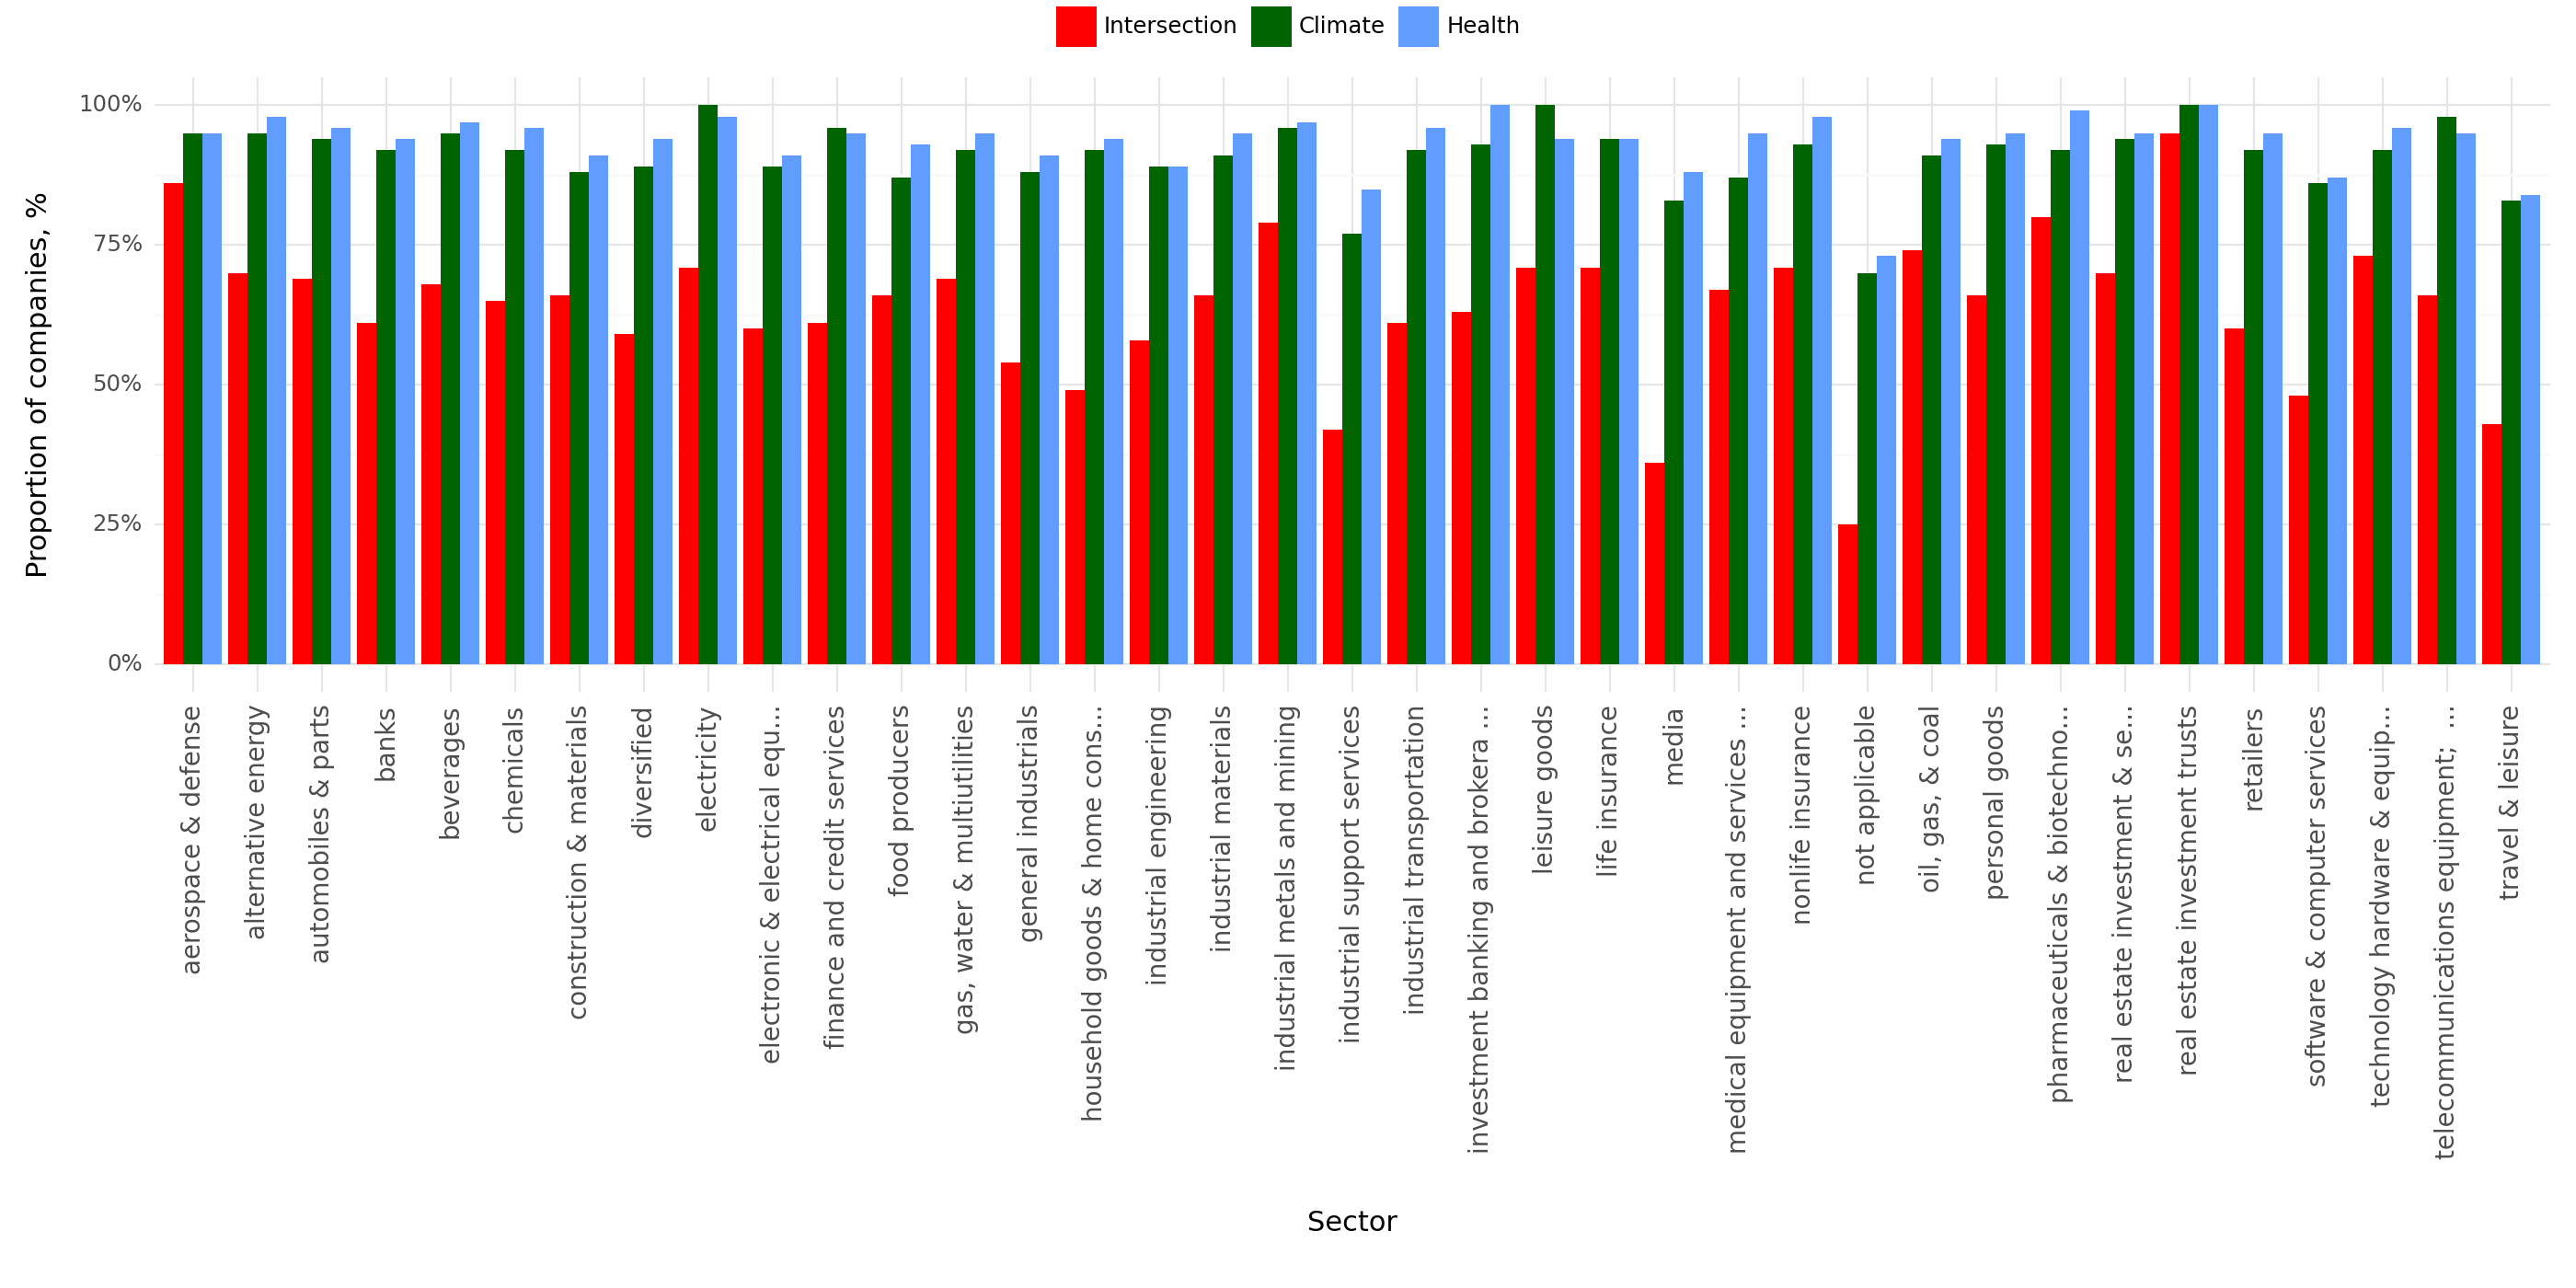

<Figure Size: (1400 x 700)>

In [53]:
n1

In [ ]:
# inequality

In [ ]:
reference = referece_EU
reference["equity_texts"] = reference.groupby(["Year", "Sector", "Id"]).equity.transform("sum") > 0
reference = reference.reset_index()

/var/folders/2n/4742tn7s13l5fcnstlm_d7g40000gn/T/ipykernel_38936/3186035111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
inter = reference[(reference.Year > 2010) & (reference.intersection > 0)].groupby(["Year"]).agg({"Id": "nunique", "equity":"sum", "equity_texts": "sum", })
inter["prop"] = (inter["equity_texts"]/inter["Id"]).round(2)
inter = inter.set_axis(["Inersection (N)", "Refernece", "Mention (N)", "prop_doct"], axis=1)
inter["Refernece"] = inter["Refernece"].astype("int")
inter["prop_ref"] = (inter["Refernece"]/inter["Inersection (N)"]).round(2)
inter.reset_index(inplace = True)
inter.to_csv("inequility/prop_intersecion_equity.csv")

In [ ]:
inter

,Year,Inersection (N),Refernece,Mention (N),prop_doct,prop_ref
0,2011,168,10,4,0.02,0.06
1,2012,195,18,5,0.03,0.09
2,2013,192,17,7,0.04,0.09
3,2014,217,13,8,0.04,0.06
4,2015,257,6,5,0.02,0.02
5,2016,273,13,10,0.04,0.05
6,2017,298,33,20,0.07,0.11
7,2018,356,38,23,0.06,0.11
8,2019,416,67,42,0.10,0.16
9,2020,548,99,55,0.10,0.18


In [ ]:
import matplotlib.pyplot as plt

/opt/homebrew/lib/python3.9/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/homebrew/lib/python3.9/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: inequility/prop_ref_intersecion_equity.png
/opt/homebrew/lib/python3.9/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/homebrew/lib/python3.9/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: inequility/prop_ref_intersecion_equity.pdf


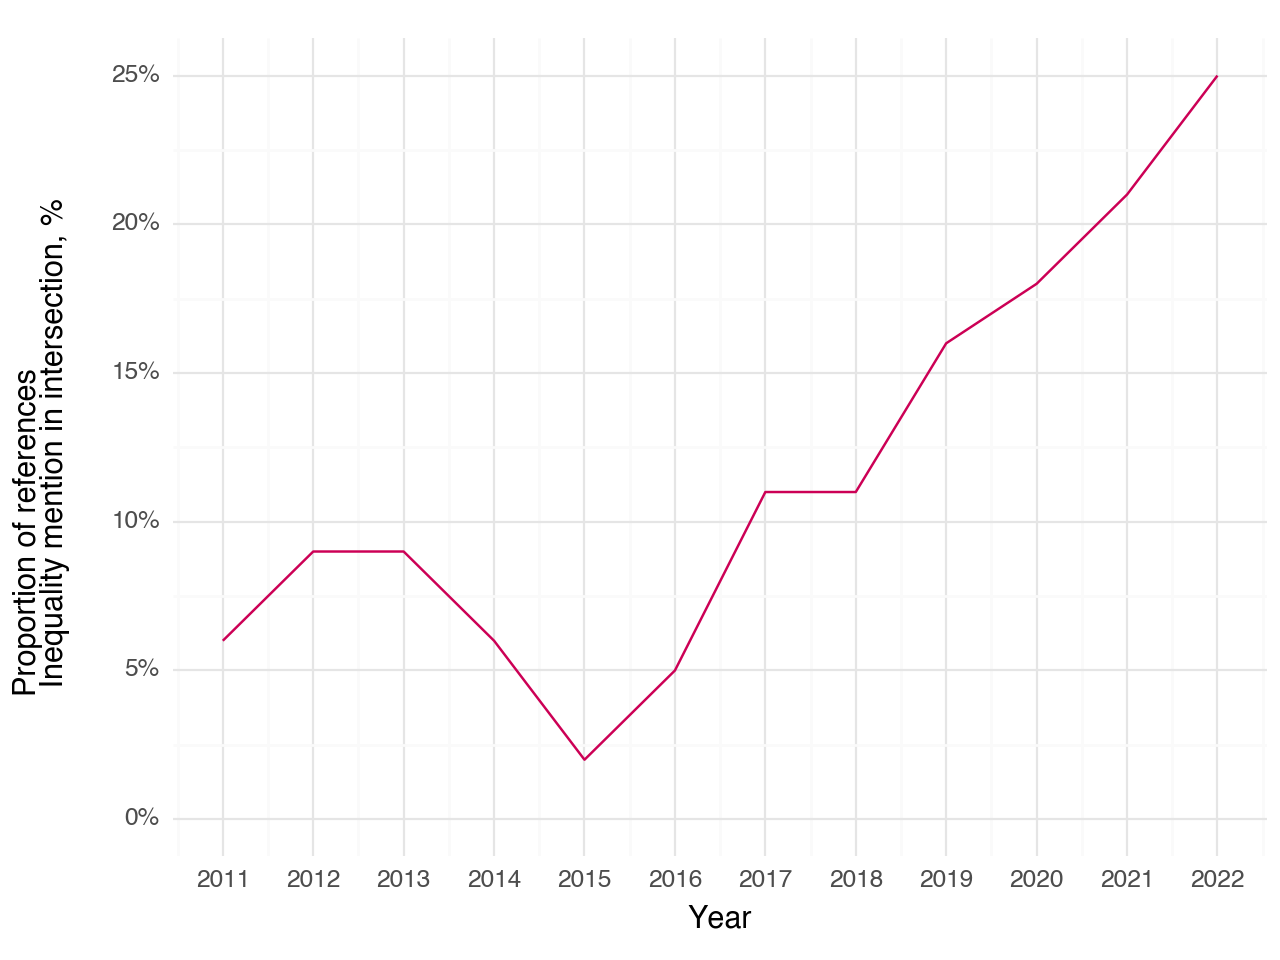

<Figure Size: (640 x 480)>

In [ ]:

#gender_inter.to_csv(path + "1o_intersection_gender.csv", index = False)
o1 = ggplot(inter, aes(x = "Year", y = "prop_ref", group = 1)) +\
        geom_line(color = "#cc0055") +\
        theme_minimal() +\
        labs(x= "Year",
            y = "Proportion of references\n Inequality mention in intersection, %\n") +\
        scale_y_continuous(labels = percent_format(), limits = (0, 0.25)) +\
        scale_x_continuous(breaks= (2011,2012, 2013,2014,2015,2016,2017, 2018,2019,2020, 2021, 2022,2023))
o1.save('inequility/prop_ref_intersecion_equity.png')
o1.save('inequility/prop_ref_intersecion_equity.pdf')
o1

/opt/homebrew/lib/python3.9/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/homebrew/lib/python3.9/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: prop_ref_intersecion_equity.png
/opt/homebrew/lib/python3.9/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/homebrew/lib/python3.9/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: prop_ref_intersecion_equity.pdf


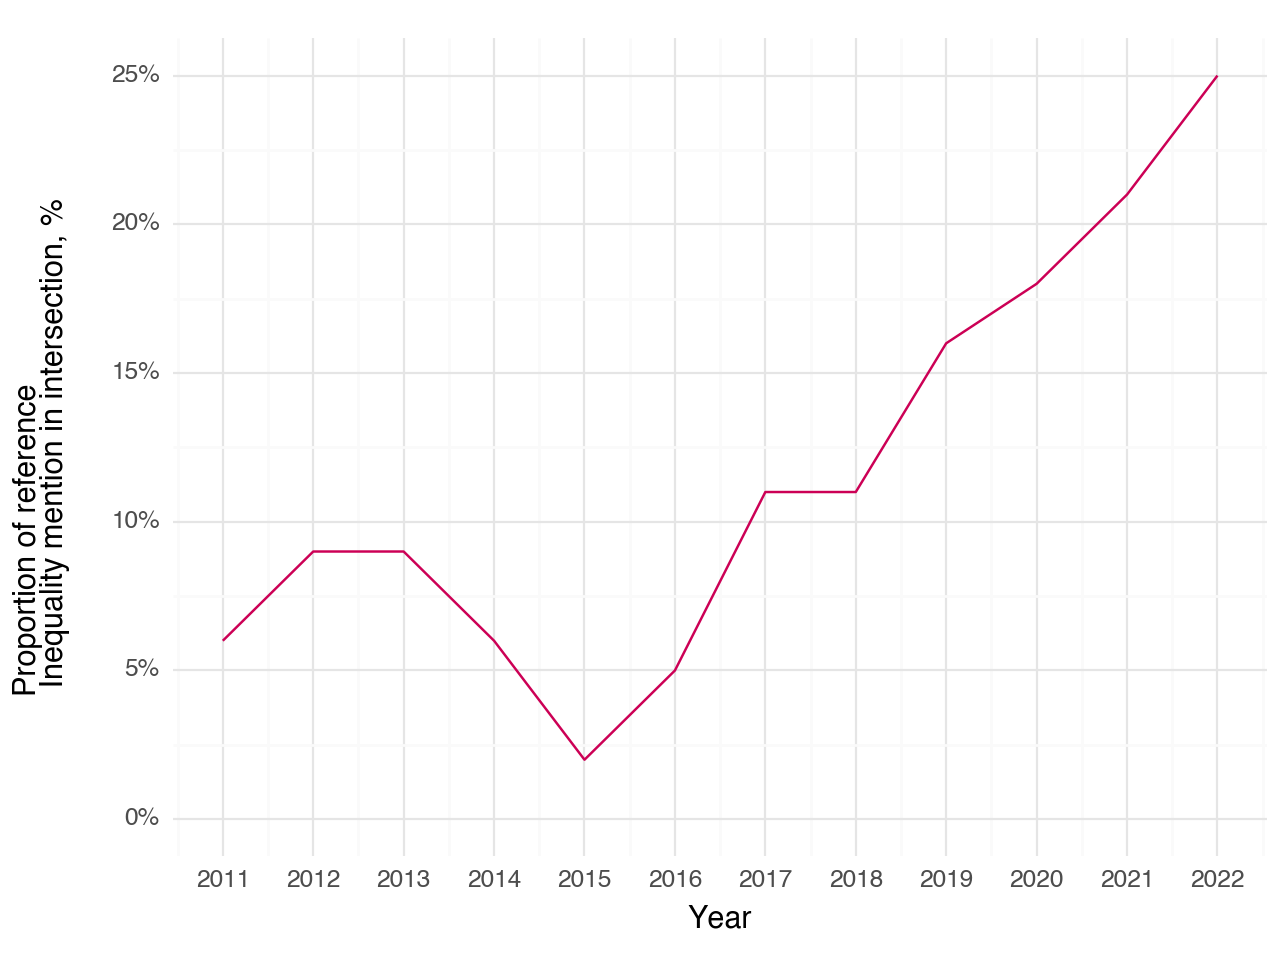

<Figure Size: (640 x 480)>

In [ ]:

#gender_inter.to_csv(path + "1o_intersection_gender.csv", index = False)
o1 = ggplot(inter, aes(x = "Year", y = "prop_ref", group = 1)) +\
        geom_line(color = "#cc0055") +\
        theme_minimal() +\
        labs(x= "Year",
            y = "Proportion of reference\n Inequality mention in intersection, %\n") +\
        scale_y_continuous(labels = percent_format(), limits = (0, None)) +\
        scale_x_continuous(breaks= (2011,2012, 2013,2014,2015,2016,2017, 2018,2019,2020, 2021, 2022,2023))
o1.save('prop_ref_intersecion_equity.png')
o1.save('prop_ref_intersecion_equity.pdf')
o1

In [ ]:
# English
referece_English = reference_all[reference_all.English >0]
folder = "English_2023/"
path = "results_2023/" + folder
print(referece_English.shape)
try:
    os.mkdir(path)
except: pass
#plotting(referece_English, path = path)

(24440, 17)


In [128]:
# run country specific analysis
Country_lst = reference_all.Country.unique()
folder = "country_result_2023/" #"global_result_2023/" # "country_result_2023/"#"EU_result_2023/"  #  #  "English_2023/" #
path_ = "/content/drive/MyDrive/hertie/lancet/lancet_2024/report_2024/" + folder
try:
    os.mkdir(path_)
except: pass
done = []
Country_lst = list(set(Country_lst).difference(set(done)))
print(Country_lst)

['Ghana', 'Iran, Islamic Republic of', 'Indonesia', 'Brazil', 'Slovenia', 'South Sudan', 'Ecuador', 'United Kingdom', 'Israel', 'Latvia', 'Ukraine', 'Cambodia', 'Tanzania, United Republic of', 'Romania', 'Austria', 'Ireland', 'Portugal', 'Viet Nam', 'Egypt', 'Myanmar', 'Mozambique', 'Saudi Arabia', 'Cyprus', 'New Zealand', 'Gambia', 'Dominican Republic', 'Panama', 'Croatia', 'Spain', 'Chile', 'Malta', 'Denmark', 'Somalia', 'United States', 'Cape Verde', 'Georgia', 'Mauritius', 'Iraq', 'Greece', 'Kazakhstan', 'Malaysia', 'Togo', 'Pakistan', 'Bulgaria', 'India', 'Italy', "Cote d'Ivoire", 'Paraguay', 'Congo, Democratic Republic of the', 'Bolivia', 'Liechtenstein', 'Uganda', 'Costa Rica', 'Papua New Guinea', 'South Africa', 'Albania', 'Nepal', 'Moldova, Republic of', 'Estonia', 'Haiti', 'Morocco', 'North Macedonia', 'Norway', 'Belgium', 'Sri Lanka', 'Tunisia', 'Poland', 'Chad', 'Nigeria', 'Philippines', 'Namibia', 'Australia', 'Gabon', 'Yemen', 'Sao Tome and Principe', 'Nicaragua', 'Sweden

In [ ]:
# Country Specific generation
import warnings
import os
warnings.filterwarnings("ignore")
print(reference_all.shape)
for Country in Country_lst:
    print(Country)
    path = path_ + Country +"/"
    try:
        os.mkdir(path)
    except:
        pass
    reference = reference_all[reference_all.Country == Country]
    print(reference.shape)
    plotting(reference, path = path)

(50016, 24)
Ghana
(72, 24)
Iran, Islamic Republic of
(14, 24)
Indonesia
(258, 24)
Brazil
(2181, 24)
Slovenia
(24, 24)
South Sudan
(5, 24)
Ecuador
(439, 24)
United Kingdom
(1724, 24)
Israel
(84, 24)
Latvia
(37, 24)
Ukraine
(192, 24)
Cambodia
(2, 24)
Tanzania, United Republic of
(9, 24)
Romania
(55, 24)
Austria
(421, 24)
Ireland
(54, 24)
Portugal
(288, 24)
Viet Nam
(51, 24)
Egypt
(236, 24)
Myanmar
(319, 24)
Mozambique
(32, 24)
Saudi Arabia
(34, 24)
Cyprus
(28, 24)
New Zealand
(28, 24)
Gambia
(2, 24)
Dominican Republic
(135, 24)
Panama
(351, 24)
Croatia
(253, 24)
Spain
(6803, 24)
Chile
(439, 24)
Malta
(7, 24)
Denmark
(2512, 24)
Somalia
(4, 24)
United States
(2022, 24)
Cape Verde
(3, 24)
Georgia
(66, 24)
Mauritius
(76, 24)
Iraq
(44, 24)
Greece
(319, 24)
Kazakhstan
(56, 24)
Malaysia
(171, 24)
Togo
(2, 24)
Pakistan
(186, 24)
Bulgaria
(133, 24)
India
(638, 24)
Italy
(964, 24)
Cote d'Ivoire
(6, 24)
Paraguay
(277, 24)
Congo, Democratic Republic of the
(9, 24)
Bolivia
(98, 24)
Liechtenstein
(24,

In [124]:
def plotting(reference, path):
    reference["intersection_texts"] = reference.groupby(["Year", "Sector", "Participant", "Id"]).intersection.transform("sum") > 0
    reference["climate_texts"] = reference.groupby(["Year", "Sector", "Participant", "Id"]).climate.transform("sum") > 0
    reference["health_texts"] = reference.groupby(["Year", "Sector", "Participant", "Id"]).health.transform("sum") > 0
    avg_sector = reference[reference.Year == 2023].groupby("Sector").agg({"intersection":"mean", "health":"mean", "climate":"mean",}).reset_index()
    avg_sector = avg_sector.round(2).sort_values("Sector")

    sum_1 = reference.agg({"Participant": ["count", "nunique",],}).T.reset_index(drop = True)
    sum_2 = reference.agg({ "health_texts": ["sum"], "climate_texts": "sum", "intersection_texts": "sum", }).reset_index(drop = True)
    summary = pd.concat([sum_1, sum_2, pd.DataFrame(sum_2.squeeze()/sum_1["count"].values).T], axis=1, )
    summary = summary.round({"health_texts":2,"climate_texts": 2, "intersection_texts": 3})
    summary = summary.set_axis(["Companies (N)", "Companies (Unique)", "Health, (N)", "Climate, (N)", "Intersection, (N)",
                      "Health, %", "Climate, %", "Intersection, %"], axis=1)
    # 0_0_data_summary
    summary.to_csv(path + '0_0_data_summary.csv', index = False)

    sum_1 = reference.groupby(["Year"]).agg({"Participant": "count",}).reset_index()
    sum_1 = sum_1.set_axis(["Year", "Companies (N)"], axis=1)
    sum_2 = reference.groupby(["Year"]).agg({ "climate_texts": "sum","health_texts": ["sum"], "intersection_texts": "sum", }).reset_index(drop = True)
    sum_2 = sum_2.set_axis(["Climate (N)", "Health (N)", "Intersection (N)"], axis=1)
    sum_3 = pd.DataFrame(sum_2.apply(lambda x: x/sum_1["Companies (N)"]).round(2))
    sum_3 = sum_3.set_axis(["Climate (Prop)", "Health (Prop)", "Intersection (Prop)"], axis=1)
    yearly_breakdown = pd.concat([sum_1, sum_2, sum_3], axis=1, )
    yearly_breakdown.to_csv(path + '0_1_yearly_breakdown.csv', index = False)

    reference_health = reference[(reference.Sector == "medical equipment and services; health care providers") |
                                 (reference.Sector == "health care")]
    sum_1 = reference_health.groupby(["Year"]).agg({"Participant": "count",}).reset_index()
    sum_1 = sum_1.set_axis(["Year", "Companies (N)"], axis=1)
    sum_2 = reference_health.groupby(["Year"]).agg({ "climate_texts": "sum","health_texts": ["sum"], "intersection_texts": "sum", }).reset_index(drop = True)
    sum_2 = sum_2.set_axis(["Climate (N)", "Health (N)", "Intersection (N)"], axis=1)
    sum_3 = pd.DataFrame(sum_2.apply(lambda x: x/sum_1["Companies (N)"]).round(2))
    sum_3 = sum_3.set_axis(["Climate (Prop)", "Health (Prop)", "Intersection (Prop)"], axis=1)
    yearly_breakdown_health = pd.concat([sum_1, sum_2, sum_3], axis=1, )

    try:
    # WHO
        sum_1 = reference.groupby(["Year", "WHO"]).agg({"Participant": "count",}).reset_index()
        sum_1 = sum_1.set_axis(["Year", "WHO", "Total documents"], axis=1)
        sum_2 = reference.groupby(["Year", "WHO"]).agg({ "climate_texts": "sum","health_texts": ["sum"], "intersection_texts": "sum", })
        sum_2 = sum_2.set_axis(["Climate", "Health", "Intersection"], axis=1)
        who_prop = pd.DataFrame(sum_2.apply(lambda x: x/sum_1["Total documents"].values).round(2)).reset_index()
        who_prop = who_prop[who_prop.WHO != 0].sort_values(["WHO", "Year"])

        sum_1 = reference_health.groupby(["Year", "WHO"]).agg({"Participant": "count",}).reset_index()
        sum_1 = sum_1.set_axis(["Year", "WHO", "Total documents"], axis=1)
        sum_2 = reference_health.groupby(["Year", "WHO"]).agg({ "climate_texts": "sum","health_texts": ["sum"], "intersection_texts": "sum", })
        sum_2 = sum_2.set_axis(["Climate", "Health", "Intersection"], axis=1)
        who_prop_health = pd.DataFrame(sum_2.apply(lambda x: x/sum_1["Total documents"].values).round(2)).reset_index()
        who_prop_health = who_prop_health[who_prop_health.WHO != 0].sort_values(["WHO", "Year"])
    except:pass

    # SIDS
    try:
        sum_1 = reference.groupby(["Year", "SIDS"]).agg({"Participant": "count",}).reset_index()
        sum_1 = sum_1.set_axis(["Year", "SIDS", "Total documents"], axis=1)
        sum_2 = reference.groupby(["Year", "SIDS"]).agg({ "climate_texts": "sum","health_texts": ["sum"], "intersection_texts": "sum", })
        sum_2 = sum_2.set_axis(["Climate", "Health", "Intersection"], axis=1)
        sids_prop = pd.DataFrame(sum_2.apply(lambda x: x/sum_1["Total documents"].values).round(2)).reset_index()
        sids_prop = sids_prop[sids_prop.SIDS != 0].sort_values(["SIDS", "Year"])

        sum_1 = reference_health.groupby(["Year", "SIDS"]).agg({"Participant": "count",}).reset_index()
        sum_1 = sum_1.set_axis(["Year", "SIDS", "Total documents"], axis=1)
        sum_2 = reference_health.groupby(["Year", "SIDS"]).agg({ "climate_texts": "sum","health_texts": ["sum"], "intersection_texts": "sum", })
        sum_2 = sum_2.set_axis(["Climate", "Health", "Intersection"], axis=1)
        sids_prop_health = pd.DataFrame(sum_2.apply(lambda x: x/sum_1["Total documents"].values).round(2)).reset_index()
        sids_prop_health = sids_prop_health[sids_prop_health.SIDS != 0].sort_values(["SIDS", "Year"])
    except:pass

    # LC grouping
    sum_1 = reference.groupby(["Year", "LC_grouping"]).agg({"Participant": "count",}).reset_index()
    sum_1 = sum_1.set_axis(["Year", "LC_grouping", "Total documents"], axis=1)
    sum_2 = reference.groupby(["Year", "LC_grouping"]).agg({ "climate_texts": "sum","health_texts": ["sum"], "intersection_texts": "sum", })
    sum_2 = sum_2.set_axis(["Climate", "Health", "Intersection"], axis=1)
    LCGrouping_prop = pd.DataFrame(sum_2.apply(lambda x: x/sum_1["Total documents"].values).round(2)).reset_index()
    LCGrouping_prop = LCGrouping_prop[LCGrouping_prop.LC_grouping != 0].sort_values(["LC_grouping", "Year"])

    sum_1 = reference_health.groupby(["Year", "LC_grouping"]).agg({"Participant": "count",}).reset_index()
    sum_1 = sum_1.set_axis(["Year", "LC_grouping", "Total documents"], axis=1)
    sum_2 = reference_health.groupby(["Year", "LC_grouping"]).agg({ "climate_texts": "sum","health_texts": ["sum"], "intersection_texts": "sum", })
    sum_2 = sum_2.set_axis(["Climate", "Health", "Intersection"], axis=1)
    LCGrouping_prop_health = pd.DataFrame(sum_2.apply(lambda x: x/sum_1["Total documents"].values).round(2)).reset_index()
    LCGrouping_prop_health = LCGrouping_prop_health[LCGrouping_prop_health.LC_grouping != 0].sort_values(["LC_grouping", "Year"])

    # HDI
    sum_1 = reference.groupby(["Year", "HDI Level (2021)"]).agg({"Participant": "count",}).reset_index()
    sum_1 = sum_1.set_axis(["Year", "HDI Level (2021)", "Total documents"], axis=1)
    sum_2 = reference.groupby(["Year", "HDI Level (2021)"]).agg({ "climate_texts": "sum","health_texts": ["sum"], "intersection_texts": "sum", })
    sum_2 = sum_2.set_axis(["Climate", "Health", "Intersection"], axis=1)
    hdi_prop = pd.DataFrame(sum_2.apply(lambda x: x/sum_1["Total documents"].values).round(2)).reset_index()
    hdi_prop = hdi_prop[hdi_prop["HDI Level (2021)"] != 0].sort_values(["HDI Level (2021)", "Year"])

    sum_1 = reference_health.groupby(["Year", "HDI Level (2021)"]).agg({"Participant": "count",}).reset_index()
    sum_1 = sum_1.set_axis(["Year", "HDI Level (2021)", "Total documents"], axis=1)
    sum_2 = reference_health.groupby(["Year", "HDI Level (2021)"]).agg({ "climate_texts": "sum","health_texts": ["sum"], "intersection_texts": "sum", })
    sum_2 = sum_2.set_axis(["Climate", "Health", "Intersection"], axis=1)
    hdi_prop_health = pd.DataFrame(sum_2.apply(lambda x: x/sum_1["Total documents"].values).round(2)).reset_index()
    hdi_prop_health = hdi_prop_health[hdi_prop_health["HDI Level (2021)"] != 0].sort_values(["HDI Level (2021)", "Year"])

    sum_1 = reference.groupby(["Sector"]).agg({"Participant": "count",}).reset_index()
    sum_1 = sum_1.set_axis(["Sector", "Total documents"], axis=1)
    sum_2 = reference.groupby(["Sector"]).agg({ "climate_texts": "sum","health_texts": ["sum"], "intersection_texts": "sum", })
    sum_2 = sum_2.set_axis(["Climate", "Health", "Intersection"], axis=1)
    sector_prop = pd.DataFrame(sum_2.apply(lambda x: x/sum_1["Total documents"].values).round(2)).reset_index()
    sector_prop = sector_prop.sort_values(["Sector"])

    reference_df_sector = reference.groupby(["Sector"]).agg({"intersection": "sum",
                                               "climate": "sum",
                                               "health":"sum", }).reset_index()
    reference_who = reference.groupby(["WHO", "Year"]).agg({"intersection": "sum",
                                               "climate": "sum",
                                               "health":"sum", })
    reference_who["sum"] = reference_who["intersection"] + reference_who["climate"] + reference_who["health"]
    reference_who.reset_index(inplace = True)
    reference_hdi = reference.groupby(["HDI Level (2021)", "Year"]).agg({"intersection": "sum",
                                               "climate": "sum",
                                               "health":"sum", }).reset_index()
    reference_hdi.HDI = pd.Categorical(reference_hdi["HDI Level (2021)"], categories=['Low',
           'Medium','High',  'Very High'], ordered=True)
    reference_hdi.dropna(inplace = True)

    reference_hdi_health = reference_health.groupby(["HDI Level (2021)", "Year"]).agg({"intersection": "sum",
                                               "climate": "sum",
                                               "health":"sum", }).reset_index()
    reference_hdi_health.HDI = pd.Categorical(reference_hdi_health["HDI Level (2021)"], categories=['Low',
           'Medium','High',  'Very High'], ordered=True)
    reference_hdi_health.dropna(inplace = True)

    reference_sids = reference.groupby(["SIDS", "Year"]).agg({"intersection": "sum",
                                               "climate": "sum",
                                               "health":"sum", }).reset_index()
    reference_sids.SIDS = pd.Categorical(reference_sids.SIDS, categories=['SIDS',
           'Tier 1','Tier 2',], ordered=True)
    reference_sids.dropna(inplace = True)

    reference_sids_health = reference_health.groupby(["SIDS", "Year"]).agg({"intersection": "sum",
                                               "climate": "sum",
                                               "health":"sum", }).reset_index()
    reference_sids_health.SIDS = pd.Categorical(reference_sids_health.SIDS, categories=['SIDS',
           'Tier 1','Tier 2',], ordered=True)
    reference_sids_health.dropna(inplace = True)



    reference_lcg = reference.groupby(["LC_grouping", "Year"]).agg({"intersection": "sum",
                                               "climate": "sum",
                                               "health":"sum", }).reset_index()
    reference_lcg["sum"] = reference_lcg["intersection"] + reference_lcg["climate"] + reference_lcg["health"]
    reference_lcg.reset_index(inplace = True)
    reference_lcg.dropna(inplace = True)

    reference_lcg_health = reference_health.groupby(["LC_grouping", "Year"]).agg({"intersection": "sum",
                                               "climate": "sum",
                                               "health":"sum", }).reset_index()
    reference_lcg_health["sum"] = reference_lcg_health["intersection"] + reference_lcg_health["climate"] + reference_lcg_health["health"]
    reference_lcg_health.reset_index(inplace = True)
    reference_lcg_health.dropna(inplace = True)


    yearly_breakdown[["Year","Climate (Prop)", "Health (Prop)", "Intersection (Prop)"]].to_csv(path+ "1a_prop_of_companies.csv")
    plt = pd.melt(yearly_breakdown[["Year","Climate (Prop)", "Health (Prop)", "Intersection (Prop)"]], id_vars=['Year'] )
    plt.variable = pd.Categorical(plt.variable, categories=["Intersection (Prop)", "Climate (Prop)", "Health (Prop)"], ordered=True)
    a1 = ggplot(plt, aes(x = "Year", y = "value", color = "variable")) + \
    geom_path(aes(linetype = "variable"), size=0.8) + \
    scale_linetype_manual(values = ("solid", 'dashdot', "--"),) + \
    annotate("text", x = 2013, y = 0.9,# 0.8,
             label = "Health", color = "#619cff") + \
    annotate("text", x = 2014, y = 0.4,#0.4,
             label = "Climate Change", color = "darkgreen") + \
    annotate("text", x = 2012, y = 0.05,
             label = "Intersection", color = "red") + \
    scale_y_continuous(labels = percent_format(), limits = (0, 1)) + \
    theme_minimal() + \
    theme(legend_position = "none") + \
    scale_colour_manual(values=("red", "darkgreen", "#619cff" )) +\
    scale_x_continuous(breaks=(2012,2014,2016,2018, 2020, 2022), ) +\
    labs(y = "Proportion of companies, %")
    a1.save(path +'1a_prop_of_companies.png')
    a1.save(path +'1a_prop_of_companies.pdf')


    yearly_breakdown_health[["Year","Climate (Prop)", "Health (Prop)", "Intersection (Prop)"]].to_csv(path+ "2p_prop_of_companies.csv")
    plt = pd.melt(yearly_breakdown_health[["Year","Climate (Prop)", "Health (Prop)", "Intersection (Prop)"]], id_vars=['Year'] )
    plt.variable = pd.Categorical(plt.variable, categories=["Intersection (Prop)", "Climate (Prop)", "Health (Prop)"], ordered=True)
    p2 = ggplot(plt, aes(x = "Year", y = "value", color = "variable")) + \
    geom_path(aes(linetype = "variable")) + \
    scale_linetype_manual(values = ("solid", 'dashdot', "--")) + \
    annotate("text", x = 2021, y = 0.95,# 0.8,
             label = "Health", color = "#619cff") + \
    annotate("text", x = 2020, y = 0.5,#0.4,
             label = "Climate Change", color = "darkgreen") + \
    annotate("text", x = 2021, y = 0.1,
             label = "Intersection", color = "red") + \
    scale_y_continuous(labels = percent_format(), limits = (0, 1)) + \
    theme_minimal() + \
    theme(legend_position = "none") + \
    scale_colour_manual(values=("red", "darkgreen", "#619cff" )) +\
    scale_x_continuous(breaks=(2012,2014,2016,2018, 2020, 2022), ) +\
    labs(y = "Proportion of companies, %")
    p2.save(path +'2p_prop_of_companies.png')
    p2.save(path +'2p_prop_of_companies.pdf')

    # breaks = (20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000)
    b1csv = reference.groupby("Year").agg({"intersection":"sum", "health":"sum", "climate":"sum"}).reset_index()
    b1csv.to_csv(path+ "1b_number_of_references.csv")
    plt = pd.melt(b1csv, id_vars=['Year'] )
    plt.variable = pd.Categorical(plt.variable, categories=["intersection", "climate", "health"], ordered=True)
    b1 = ggplot(plt, aes(x = "Year", y = "value", color = "variable")) + \
    geom_path(aes(linetype = "variable")) + \
    scale_linetype_manual(values = ("solid", 'dashdot', "--")) + \
    annotate("text", x = 2016, y = 50000, label = "Health", color = "#619cff") + \
    annotate("text", x = 2018, y = 9000, label = "Climate Change", color = "darkgreen") + \
    annotate("text", x = 2013, y = 5000, label = "Intersection", color = "red") + \
    scale_y_continuous(limits = (0, None), ) + \
    theme_minimal() + \
    theme(legend_position = "none") + \
    scale_colour_manual(values=("red", "darkgreen", "#619cff" )) +\
    scale_x_continuous(breaks=(2012,2014,2016,2018, 2020, 2022), ) +\
    labs(y = "Total number of references")
    b1.save(path +'1b_number_of_references.png')
    b1.save(path +'1b_number_of_references.pdf')

    q2csv = reference_health.groupby("Year").agg({"intersection":"sum", "health":"sum", "climate":"sum"}).reset_index()
    q2csv.to_csv(path+ "2q_number_of_references.csv")
    plt = pd.melt(q2csv, id_vars=['Year'] )
    plt.variable = pd.Categorical(plt.variable, categories=["intersection", "climate", "health"], ordered=True)
    q2 = ggplot(plt, aes(x = "Year", y = "value", color = "variable")) + \
    geom_path(aes(linetype = "variable")) + \
    scale_linetype_manual(values = ("solid", 'dashdot', "--")) + \
    annotate("text", x = 2020, y =4000, label = "Health", color = "#619cff") + \
    annotate("text", x = 2016, y = 800, label = "Climate Change", color = "darkgreen") + \
    annotate("text", x = 2018, y = 200, label = "Intersection", color = "red") + \
    scale_y_continuous(limits = (0, None), ) + \
    theme_minimal() + \
    theme(legend_position = "none") + \
    scale_colour_manual(values=("red", "darkgreen", "#619cff" )) +\
    scale_x_continuous(breaks=(2012,2014,2016,2018, 2020, 2022), ) +\
    labs(y = "Total number of references")
    # 1b_number_of_references
    q2.save(path +'2q_number_of_references.png')
    q2.save(path +'2q_number_of_references.pdf')

    c1csv = reference.groupby("Year").agg({"intersection":"sum"}).reset_index()
    c1csv.to_csv(path+ "1c_number_of_references_intersection.csv")
    plt = pd.melt(c1csv, id_vars=['Year'] )
    c1 = ggplot(plt, aes(x = "Year", y = "value", color = "variable")) + \
    geom_path(aes(linetype = "variable")) + \
    annotate("text", x = 2015, y = 2, label = "Intersection", color = "red") + \
    scale_y_continuous(limits = (0, None),) + \
    theme_minimal() + \
    theme(legend_position = "none") + \
    scale_colour_manual(values=("red",)) +\
    scale_x_continuous(breaks=(2012,2014,2016,2018, 2020, 2022), ) +\
    labs(y = "Total number of references")
    c1.save(path +'1c_number_of_references_intersection.png')
    c1.save(path +'1c_number_of_references_intersection.pdf')

    r2csv = reference_health.groupby("Year").agg({"intersection":"sum"}).reset_index()
    r2csv.to_csv(path+ "2r_number_of_references_intersection.csv")
    plt = pd.melt(r2csv, id_vars=['Year'] )
    r2 = ggplot(plt, aes(x = "Year", y = "value", color = "variable")) + \
    geom_path(aes(linetype = "variable")) + \
    annotate("text", x = 2020, y = 4, label = "Intersection", color = "red") + \
    scale_y_continuous(limits = (0, None),) + \
    theme_minimal() + \
    theme(legend_position = "none") + \
    scale_colour_manual(values=("red",)) +\
    scale_x_continuous(breaks=(2012,2014,2016,2018, 2020, 2022), ) +\
    labs(y = "Total number of references")
    r2.save(path +'2r_number_of_references_intersection.png')
    r2.save(path +'2r_number_of_references_intersection.pdf')

    yearly_breakdown[["Year", "Intersection (Prop)"]].to_csv(path+ "1d_proportion_intersection.csv")
    plt = pd.melt(yearly_breakdown[["Year", "Intersection (Prop)"]], id_vars=['Year'] )
    plt.variable = pd.Categorical(plt.variable, categories=["Intersection (Prop)",], ordered=True)
    d1 = ggplot(plt, aes(x = "Year", y = "value", color = "variable")) + \
    geom_path(aes(linetype = "variable")) + \
    annotate("text", x = 2012, y = 0.1, label = "Intersection", color = "red") + \
    scale_y_continuous(labels = percent_format(), limits = (0, None)) + \
    theme_minimal() + \
    theme(legend_position = "none") + \
    scale_colour_manual(values=("red",  )) +\
    scale_x_continuous(breaks=(2012,2014,2016,2018, 2020, 2022), ) +\
    labs(y = "Proportion of companies, %")
    d1.save(path +'1d_proportion_intersection.png')
    d1.save(path +'1d_proportion_intersection.pdf')

    e1csv = reference.groupby("Year").agg({"intersection":"mean", "health":"mean", "climate":"mean"}).reset_index()
    e1csv.to_csv(path+ "1e_avg_references.csv")
    plt = pd.melt(e1csv, id_vars=['Year'] )
    plt.variable = pd.Categorical(plt.variable, categories=["intersection", "climate", "health"], ordered=True)
    e1 = ggplot(plt, aes(x = "Year", y = "value", color = "variable")) + \
    geom_path(aes(linetype = "variable")) + \
    scale_linetype_manual(values = ("solid", 'dashdot', "--")) + \
    annotate("text", x = 2015, y = 25, label = "Health", color = "#619cff") + \
    annotate("text", x = 2014, y = 8, label = "Climate Change", color = "darkgreen") + \
    annotate("text", x = 2017, y = 2, label = "Intersection", color = "red") + \
    scale_y_continuous(limits = (0, None), ) + \
    theme_minimal() + \
    theme(legend_position = "none") + \
    scale_colour_manual(values=("red", "darkgreen", "#619cff" )) +\
    scale_x_continuous(breaks=(2012,2014,2016,2018, 2020, 2022), ) +\
    labs(y = "Average number of references")
    e1.save(path +'1e_avg_references.png')
    e1.save(path +'1e_avg_references.pdf')

    e1csv = reference_health.groupby("Year").agg({"intersection":"mean", "health":"mean", "climate":"mean"}).reset_index()
    e1csv.to_csv(path+ "2s_avg_references.csv")
    plt = pd.melt(e1csv, id_vars=['Year'] )
    plt.variable = pd.Categorical(plt.variable, categories=["intersection", "climate", "health"], ordered=True)
    e1 = ggplot(plt, aes(x = "Year", y = "value", color = "variable")) + \
    geom_path(aes(linetype = "variable")) + \
    scale_linetype_manual(values = ("solid", 'dashdot', "--")) + \
    annotate("text", x = 2018, y = 60, label = "Health", color = "#619cff") + \
    annotate("text", x = 2019, y = 20, label = "Climate Change", color = "darkgreen") + \
    annotate("text", x = 2021, y = 5, label = "Intersection", color = "red") + \
    scale_y_continuous(limits = (0, None), ) + \
    theme_minimal() + \
    theme(legend_position = "none") + \
    scale_colour_manual(values=("red", "darkgreen", "#619cff" )) +\
    scale_x_continuous(breaks=(2012,2014,2016,2018, 2020, 2022), ) +\
    labs(y = "Average number of references")
    e1.save(path +'2s_avg_references.png')
    e1.save(path +'2s_avg_references.pdf')

    try:
        reference_lcg[reference_lcg.LC_grouping !=0].to_csv(path+ "1q_LC-Grouping_number_references.csv")
        q1 = ggplot(reference_lcg[reference_lcg.LC_grouping !=0], aes(x = "Year", y = "intersection", color = "LC_grouping")) + \
        geom_path(aes()) + \
        scale_y_continuous(limits = (0, None), ) + \
        theme_minimal() + \
        theme(legend_position = "right") + \
        scale_x_continuous(breaks=(2012,2014,2016,2018, 2020, 2022), ) +\
        labs(y = "Total number of references")
        q1.save(path +'1q_LC-Grouping_number_references.png')
        q1.save(path +'1q_LC-Grouping_number_references.pdf')

        LCGrouping_prop_health[LCGrouping_prop_health.LC_grouping !=0].to_csv(path+ "2q_LC-Grouping_prop_references.csv")
        q2 = ggplot(LCGrouping_prop_health[LCGrouping_prop_health.LC_grouping !=0], aes(x = "Year", y = "Intersection", color = "LC_grouping")) + \
        geom_path(aes()) + \
        scale_y_continuous(labels = percent_format(), limits = (0, None)) + \
        theme_minimal() + \
        theme(legend_position = "right") + \
        scale_x_continuous(breaks=(2012,2014,2016,2018, 2020, 2022), ) +\
        labs(y = "Proportion of companies, %")
        q2.save(path +'2q_LC-Grouping_prop_references.png')
        q2.save(path +'2q_LC-Grouping_prop_references.pdf')

        LCGrouping_prop[LCGrouping_prop.LC_grouping !=0].to_csv(path+ "1q1_LC-grouping_prop_references.csv")
        q11 = ggplot(LCGrouping_prop[LCGrouping_prop.LC_grouping !=0], aes(x = "Year", y = "Intersection", color = "LC_grouping")) + \
        geom_path(aes()) + \
        scale_y_continuous(labels = percent_format(), limits = (0, None)) + \
        theme_minimal() + \
        theme(legend_position = "right") + \
        scale_x_continuous(breaks=(2012,2014,2016,2018, 2020, 2022), ) +\
        labs(y = "Proportion of companies, %")
        q11.save(path +'1q1_LC-grouping_prop_references.png')
        q11.save(path +'1q1_LC-grouping_prop_references.pdf')
    except:pass

    try:
        reference_who[reference_who.WHO !=0].to_csv(path+ "1f_who_number_references.csv")
        f1 = ggplot(reference_who[reference_who.WHO !=0], aes(x = "Year", y = "intersection", color = "WHO")) + \
        geom_path(aes()) + \
        scale_y_continuous(limits = (0, None), ) + \
        theme_minimal() + \
        theme(legend_position = "right") + \
        scale_x_continuous(breaks=(2012,2014,2016,2018, 2020, 2022), ) +\
        labs(y = "Total number of references")
        f1.save(path +'1f_who_number_references.png')
        f1.save(path +'1f_who_number_references.pdf')

        reference_who_health = reference_health.groupby(["WHO", "Year"]).agg({"intersection": "sum",
                                                   "climate": "sum",
                                                   "health":"sum", })
        reference_who_health["sum"] = reference_who_health["intersection"] + reference_who_health["climate"] + reference_who_health["health"]
        reference_who_health.reset_index(inplace = True)

        reference_who_health["Sector"] = "medical equipment and services; health care providers or health care"
        reference_who_health[reference_who_health.WHO !=0].to_csv(path+ "2t_who_number_references.csv")
        f1 = ggplot(reference_who_health[reference_who_health.WHO !=0], aes(x = "Year", y = "intersection", color = "WHO")) + \
        geom_path(aes()) + \
        scale_y_continuous(limits = (0, None), ) + \
        theme_minimal() + \
        theme(legend_position = "right") + \
        scale_x_continuous(breaks=(2012,2014,2016,2018, 2020, 2022), ) +\
        labs(y = "Total number of references")
        f1.save(path +'2t_who_number_references.png')
        f1.save(path +'2t_who_number_references.pdf')

        who_prop[who_prop.WHO !=0].to_csv(path+ "1g_who_prop_references.csv")
        g1 = ggplot(who_prop[who_prop.WHO !=0], aes(x = "Year", y = "Intersection", color = "WHO")) + \
        geom_path(aes()) + \
        scale_y_continuous(labels = percent_format(), limits = (0, None)) + \
        theme_minimal() + \
        theme(legend_position = "right") + \
        scale_x_continuous(breaks=(2012,2014,2016,2018, 2020, 2022), ) +\
        labs(y = "Proportion of companies, %")
        g1.save(path +'1g_who_prop_references.png')
        g1.save(path +'1g_who_prop_references.pdf')

        who_prop_health[who_prop_health.WHO !=0].to_csv(path+ "2u_who_prop_references.csv")
        g1 = ggplot(who_prop_health[who_prop_health.WHO !=0], aes(x = "Year", y = "Intersection", color = "WHO")) + \
        geom_path(aes()) + \
        scale_y_continuous(labels = percent_format(), limits = (0, None)) + \
        theme_minimal() + \
        theme(legend_position = "right") + \
        scale_x_continuous(breaks=(2012,2014,2016,2018, 2020, 2022), ) +\
        labs(y = "Proportion of companies, %")
        g1.save(path +'2u_who_prop_references.png')
        g1.save(path +'2u_who_prop_references.pdf')
    except:pass

    try:
        #1h_sids_number_references.csv
        reference_sids["sum"] = reference_sids["intersection"] + reference_sids["climate"] + reference_sids["health"]
        reference_sids.to_csv(path+ "1h_sids_number_references.csv")
        h1 = ggplot(reference_sids[reference_sids.SIDS != 0], aes(x = "Year", y = "intersection", color = "SIDS")) + \
        geom_path(aes()) + \
        scale_y_continuous(limits = (0, None), ) + \
        theme_minimal() + \
        theme(legend_position = "right") + \
        scale_x_continuous(breaks=(2012,2014,2016,2018, 2020, 2022), ) +\
        labs(y = "Total number of references")
        h1.save(path +'1h_sids_number_references.png')
        h1.save(path +'1h_sids_number_references.pdf')

        #2v_sids_number_references.csv
        reference_sids_health["sum"] = reference_sids_health["intersection"] + reference_sids_health["climate"] + reference_sids_health["health"]
        reference_sids.to_csv(path+ "2v_sids_number_references.csv")
        h1 = ggplot(reference_sids_health[reference_sids_health.SIDS != 0], aes(x = "Year", y = "intersection", color = "SIDS")) + \
        geom_path(aes()) + \
        scale_y_continuous(limits = (0, None), ) + \
        theme_minimal() + \
        theme(legend_position = "right") + \
        scale_x_continuous(breaks=(2012,2014,2016,2018, 2020, 2022), ) +\
        labs(y = "Total number of references")
        h1.save(path +'2v_sids_number_references.png')
        h1.save(path +'2v_sids_number_references.pdf')

        sids_prop[sids_prop.SIDS !=0].to_csv(path+ "1i_sids_prop_references.csv")
        i1 = ggplot(sids_prop[sids_prop.SIDS !=0], aes(x = "Year", y = "Intersection", color = "SIDS")) + \
        geom_path(aes()) + \
        scale_y_continuous(labels = percent_format(), limits = (0, None)) + \
        theme_minimal() + \
        theme(legend_position = "right") + \
        scale_x_continuous(breaks=(2012,2014,2016,2018, 2020, 2022), ) +\
        labs(y = "Proportion of companies, %")
        i1.save(path +'1i_sids_prop_references.png')
        i1.save(path +'1i_sids_prop_references.pdf')

        sids_prop_health[sids_prop_health.SIDS !=0].to_csv(path+ "2w_sids_prop_references.csv")
        i1 = ggplot(sids_prop_health[sids_prop_health.SIDS !=0], aes(x = "Year", y = "Intersection", color = "SIDS")) + \
        geom_path(aes()) + \
        scale_y_continuous(labels = percent_format(), limits = (0, None)) + \
        theme_minimal() + \
        theme(legend_position = "right") + \
        scale_x_continuous(breaks=(2012,2014,2016,2018, 2020, 2022), ) +\
        labs(y = "Proportion of companies, %")
        i1.save(path +'2w_sids_prop_references.png')
        i1.save(path +'2w_sids_prop_references.pdf')
    except:pass

    try:
        reference_hdi["sum"] = reference_hdi["intersection"] + reference_hdi["climate"] + reference_hdi["health"]
        reference_hdi.to_csv(path+ "1j_hdi_number_references.csv")
        j1 = ggplot(reference_hdi[reference_hdi["HDI Level (2021)"] != 0], aes(x = "Year", y = "intersection", color = "HDI Level (2021)")) + \
        geom_path(aes()) + \
        scale_y_continuous(limits = (0, None), ) + \
        theme_minimal() + \
        theme(legend_position = "right") + \
        scale_x_continuous(breaks=(2012,2014,2016,2018, 2020, 2022), ) +\
        labs(y = "Total number of references")
        j1.save(path +'1j_hdi_number_references.png')
        j1.save(path +'1j_hdi_number_references.pdf')

        reference_hdi_health["sum"] = reference_hdi_health["intersection"] + reference_hdi_health["climate"] + reference_hdi_health["health"]
        reference_hdi_health["Sector"] = "medical equipment and services; health care providers or health care"
        reference_hdi_health.to_csv(path+ "2x_hdi_number_references.csv")
        j1 = ggplot(reference_hdi_health[reference_hdi_health["HDI Level (2021)"] != 0], aes(x = "Year", y = "intersection", color = "HDI Level (2021)")) + \
        geom_path(aes()) + \
        scale_y_continuous(limits = (0, None), ) + \
        theme_minimal() + \
        theme(legend_position = "right") + \
        scale_x_continuous(breaks=(2012,2014,2016,2018, 2020, 2022), ) +\
        labs(y = "Total number of references")
        j1.save(path +'2x_hdi_number_references.png')
        j1.save(path +'2x_hdi_number_references.pdf')

        hdi_prop[hdi_prop["HDI Level (2021)"] !=0].to_csv(path+ "1k_hdi_prop_references.csv")
        k1 = ggplot(hdi_prop[hdi_prop["HDI Level (2021)"] !=0], aes(x = "Year", y = "Intersection", color = "HDI Level (2021)")) + \
        geom_path(aes()) + \
        scale_y_continuous(labels = percent_format(), limits = (0, None)) + \
        theme_minimal() + \
        theme(legend_position = "right") + \
        scale_x_continuous(breaks=(2012,2014,2016,2018, 2020, 2022), ) +\
        labs(y = "Proportion of companies, %")
        # 1k_hdi_prop_references
        k1.save(path +'1k_hdi_prop_references.png')
        k1.save(path +'1k_hdi_prop_references.pdf')

        hdi_prop_health[hdi_prop_health["HDI Level (2021)"] !=0].to_csv(path+ "2y_hdi_prop_references.csv")
        k1 = ggplot(hdi_prop_health[hdi_prop_health["HDI Level (2021)"] !=0], aes(x = "Year", y = "Intersection", color = "HDI Level (2021)")) + \
        geom_path(aes()) + \
        scale_y_continuous(labels = percent_format(), limits = (0, None)) + \
        theme_minimal() + \
        theme(legend_position = "right") + \
        scale_x_continuous(breaks=(2012,2014,2016,2018, 2020, 2022), ) +\
        labs(y = "Proportion of companies, %")
        # 1k_hdi_prop_references
        k1.save(path +'2y_hdi_prop_references.png')
        k1.save(path +'2y_hdi_prop_references.pdf')
    except:pass

    # 1l_sector_references_2023
    reference_df_sector.to_csv(path+"1l_sector_references_2023.csv")

    avg_sector.to_csv(path + "1m_avg_sector_references_2023.csv")

    # 1n_prop_companies_sector.csv  in 2022


    sector_prop["Year"] = 2023
    sector_prop.to_csv(path + "1n_prop_companies_sector.csv")
    melt = sector_prop.melt(id_vars=["Sector", 'Year'])
    melt.variable = pd.Categorical(melt.variable, categories=["Intersection", "Climate", "Health"], ordered=True)
    n1 = ggplot(melt, aes(x = "Sector", y = "value", fill = "variable")) + \
      geom_bar(stat = "identity", position = "dodge") + \
      theme_minimal() + \
      scale_y_continuous(labels = percent_format()) + \
      theme(axis_text_x = element_text(angle = 90, vjust = 1, hjust=0.5, size = 10 ), ) + \
      theme(legend_position = (0.5, 1), legend_direction="horizontal", figure_size=(14, 7)) + \
      scale_fill_manual(values=("red", "darkgreen", "#619cff" )) +\
      labs(fill = "",
           y = "Proportion of companies, %",
           x = "\nSector")
    n1.save(path +'1n_prop_companies_sector.png')
    n1.save(path +'1n_prop_companies_sector.pdf')

    reference["covid_texts"] = reference.groupby(["Year", "Sector", "Id"]).covid.transform("sum") > 0
    reference["gender_texts"] = reference.groupby(["Year", "Sector", "Id"]).gender.transform("sum") > 0
    reference["equity_texts"] = reference.groupby(["Year", "Sector", "Id"]).equity.transform("sum") > 0

    try:
        covid_inter = reference[(reference.Year > 2019) & (reference.intersection > 0)].groupby(["Year"]).agg({"Id": "nunique", "covid":"sum", "covid_texts": "sum",})
        covid_inter["prop"] = (covid_inter["covid_texts"]/covid_inter["Id"]).round(2)
        covid_inter = covid_inter.set_axis(["total_docs", "hits", "documents", "prop_doct"], axis=1)
        covid_inter["hits"] = covid_inter["hits"].astype("int")
        covid_inter.reset_index(inplace = True)
        covid_inter.to_csv(path + "1o_intersection_covid.csv")

        o1 = ggplot(covid_inter, aes(x = "Year", y = "prop_doct", group = 1)) +\
          geom_line(color = "#cc0055") +\
          theme_minimal() +\
          labs(x= "Year",
               y = "Proportion of companies\n Covid mention in intersection, %\n") +\
          scale_y_continuous(labels = percent_format(), limits = (0, None))
        o1.save(path +'1o_prop_intersecion_covid.png')
        o1.save(path +'1o_prop_intersecion_covid.pdf')
    except:pass

    try:
        # 1o_intersection_gender
        gender_inter = reference[(reference.Year > 2010) & (reference.intersection > 0)].groupby(["Year"]).agg({"Id": "nunique", "gender":"sum", "gender_texts": "sum", })
        gender_inter["prop"] = (gender_inter["gender_texts"]/gender_inter["Id"]).round(2)
        gender_inter = gender_inter.set_axis(["total_docs", "hits", "documents", "prop_doct"], axis=1)
        gender_inter["hits"] = gender_inter["hits"].astype("int")
        gender_inter.reset_index(inplace = True)

        gender_inter.to_csv(path + "1o_intersection_gender.csv", index = False)
        o1 = ggplot(gender_inter, aes(x = "Year", y = "prop_doct", group = 1)) +\
          geom_line(color = "#cc0055") +\
          theme_minimal() +\
          labs(x= "Year",
               y = "Proportion of companies\n Gender mention in intersection, %\n") +\
          scale_y_continuous(labels = percent_format(), limits = (0, None))
        o1.save(path +'1o_prop_intersecion_gender.png')
        o1.save(path +'1o_prop_intersecion_gender.pdf')
    except:pass

    try:
        equity_inter = reference[(reference.Year > 2011) & (reference.intersection > 0)].groupby(["Year"]).agg({"Id": "nunique", "equity":"sum", "equity_texts": "sum",})
        equity_inter["prop"] = (equity_inter["equity_texts"]/equity_inter["Id"]).round(2)
        equity_inter = equity_inter.set_axis(["total_docs", "hits", "documents", "prop_doct"], axis=1)
        equity_inter["hits"] = equity_inter["hits"].astype("int")
        equity_inter.reset_index(inplace = True)
        equity_inter.to_csv(path + "1o_intersection_equity.csv")

        o1 = ggplot(equity_inter, aes(x = "Year", y = "prop_doct", group = 1)) +\
          geom_line(color = "#cc0055") +\
          theme_minimal() +\
          labs(x= "Year",
               y = "Proportion of companies\n Inequality mention in intersection, %\n") +\
          scale_y_continuous(labels = percent_format(), limits = (0, None))
        o1.save(path +'1o_prop_intersecion_equity.png')
        o1.save(path +'1o_prop_intersecion_equity.pdf')
    except:pass

    reference = reference[reference.Year == 2023]
    sum_1 = reference.groupby(["Sector"]).agg({"Participant": "count"}).reset_index()
    sum_1 = sum_1.set_axis(["Sector", "Total documents"], axis=1)
    sum_2 = reference.groupby(["Sector"]).agg({ "climate_texts": "sum","health_texts": ["sum"], "intersection_texts": "sum", }).reset_index()
    sum_2 = sum_2.set_axis(["Sector", "Climate (N)", "Health(N)", "Intersection(N)"], axis=1)

    reference_df_sector = reference.groupby(["Sector"]).agg({"intersection": "sum",
                                                  "climate": "sum",
                                                  "health":"sum", }).reset_index()
    sector_prop_report = pd.DataFrame(sum_2.set_index("Sector").apply(lambda x: x/sum_1["Total documents"].values).round(2)).reset_index()
    sector_prop_report = sector_prop_report.set_axis(["Sector", "Climate", "Health", "Intersection"], axis=1)
    d1 = sum_1.merge(sum_2, on = "Sector")
    sector_prop_company_2023 = d1.merge(sector_prop_report, on = "Sector")
    sector_prop_company_2023.to_csv(path + "sector_prop_documents_2023.csv")

In [62]:
path

'/content/drive/MyDrive/hertie/lancet/lancet_2024/report_2024/global_result_2023/'

In [71]:
reference = reference_all
reference["equity_texts"] = reference.groupby(["Year", "Sector", "Id"]).equity.transform("sum") > 0
for i in [1]:
        equity_inter = reference[(reference.Year > 2010) & (reference.intersection > 0)].groupby(["Year"]).agg({"Id": "nunique", "equity":"sum", "equity_texts": "sum",})
        equity_inter["prop"] = (equity_inter["equity_texts"]/equity_inter["Id"]).round(2)
        equity_inter = equity_inter.set_axis(["total_docs", "hits", "documents", "prop_doct"], axis=1)
        equity_inter["hits"] = equity_inter["hits"].astype("int")
        equity_inter.reset_index(inplace = True)
        equity_inter.to_csv(path + "1o_intersection_equity.csv")

        o1 = ggplot(equity_inter, aes(x = "Year", y = "prop_doct", group = 1)) +\
          geom_line(color = "#cc0055") +\
          theme_minimal() +\
          labs(x= "Year",
               y = "Proportion of companies\n Inequality mention in intersection, %\n") +\
          scale_y_continuous(labels = percent_format(), limits = (0, None))
        o1.save(path +'1o_prop_intersecion_equity.png')
        o1.save(path +'1o_prop_intersecion_equity.pdf')

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /content/drive/MyDrive/hertie/lancet/lancet_2024/report_2024/global_result_2023/1o_prop_intersecion_equity.png
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /content/drive/MyDrive/hertie/lancet/lancet_2024/report_2024/global_result_2023/1o_prop_intersecion_equity.pdf


In [69]:
equity_inter[equity_inter.Year == 2023]

,Year,total_docs,hits,documents,prop_doct
12,2023.0,2744,1493,688,0.25
